# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# 🌱 Greenhouse Gas Emission Prediction Project

![GHG Emissions](https://www.shalom-education.com/wp-content/uploads/2022/12/Shutterstock_1667551381-1-1024x1006.jpg)

**Project Goal:**  
To analyze and predict greenhouse gas (GHG) emissions from various U.S. industries and commodities using the official dataset from [data.gov](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities).

![GHG Emissions](https://edg.epa.gov/EPALogo.svg)

**Source:**  
[Supply Chain Greenhouse Gas Emission Factors](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities)

  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn  


## 📂 Dataset Overview

This dataset contains supply chain emission factors associated with various U.S. industries and commodities.

**Key Columns:**
- `Code`: Industry classification code
- `Industry_Name`: Name of the industry
- `Commodity`: Item or commodity name
- `GHG_Emissions_kgCO2e`: GHG emissions per unit (kg CO2 equivalent)
- `Units`: Measurement units (e.g., [kg/2018 USD, purchaser price])



## 🧹 Data Preprocessing

Steps:
- Handle missing values
- Convert units where needed
- Encode categorical features
- Normalize/scale numeric columns

## 🤖 Model Building & Evaluation

We aim to predict `GHG_Emissions_kgCO2e` using regression models.

Models to try:
- Linear Regression
- Random Forest

**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score


##### Steps:
- Step 1: Import Required Libraries
- Step 2: Load Dataset
- Step 3: Data Preprocessing (EDA+Cleaning+Encoding)
- Step 4: Training
- Step 5: Prediction and Evaluation
- Step 6: Hyperparameter Tuning
- Step 7: Comapartive Study and Slecting the Best model


# Step 1: Import Required Libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Step 2: Load Dataset

In [ ]:
excel_file = '/content/GHGemissionData.xlsx'  # Replace with actual path
years = range(2010, 2017)

In [ ]:
years[5]

In [ ]:
df_1 = pd.read_excel(excel_file, sheet_name=f'2015_Detail_Commodity')
df_1.head()

In [ ]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

In [ ]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [ ]:
all_data[3]

In [ ]:
len(all_data)

In [ ]:
df = pd.concat(all_data, ignore_index=True)
df.head()

In [ ]:
len(df)

# Step 3: Data Preprocessing

In [ ]:
df.columns # Checking columns

In [ ]:
df.isnull().sum()

## Week 2 - 23 June 2025 - S4F

In [ ]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [ ]:
df.columns

In [ ]:
print(df.info())   # Checking data types and non-null counts

In [ ]:
df.describe().T # Checking summary statistics

In [ ]:
df.isnull().sum() # Checking for null values in each column

In [ ]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
# Check categorical variables
print(df['Substance'].value_counts())

In [ ]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count

In [ ]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

In [ ]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count

In [ ]:
df['Substance'].unique() # Checking unique values in 'Substance'

In [ ]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} # Mapping substances to integers

In [ ]:
df['Substance']=df['Substance'].map(substance_map)

In [ ]:
df['Substance'].unique() # Checking unique values in 'Substance'

In [ ]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

In [ ]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers

In [ ]:
df['Unit']=df['Unit'].map(unit_map)

In [ ]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

In [ ]:
print(df['Source'].unique()) # Checking unique values in 'Source'

In [ ]:
source_map={'Commodity':0, 'Industry':1} # Mapping sources to integers

In [ ]:
df['Source']=df['Source'].map(source_map)   # applying the mapping to 'Source' column

In [ ]:
print(df['Source'].unique()) # Checking unique values in 'Source'

In [ ]:
df.info() # Checking data types and non-null counts after mapping

In [ ]:
df.Code.unique() # Checking unique values in 'Code' df['Code']

In [ ]:
df.Name.unique() # Checking unique values in 'Name'

In [ ]:
len(df.Name.unique()) # Checking number of unique values in 'Name'

##### Top 10 Emmiting Industry

In [ ]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()

In [ ]:
top_emitters

In [ ]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

##### Drop non-numeric columns not needed,
##### Alos drop Code and Year columns since there is no need of both of the columns

In [ ]:

df.drop(columns=['Name','Code','Year'], inplace=True)

In [ ]:
df.head(1)

In [ ]:
df.shape

##### Define features and target

In [ ]:
df.columns

In [ ]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable

In [ ]:
X.head()

In [ ]:
y.head()

### Univariate Analysis

In [ ]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

In [ ]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()


In [ ]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

### Multivariate Anslysis

##### Correlation heatmap

In [ ]:
df.select_dtypes(include=np.number).corr() # Checking correlation between numerical features

In [ ]:
df.info() # Checking data types and non-null counts after mapping

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Training
# Split data into training and testing sets
X = df.drop(columns=['Supply Chain Emission Factors with Margins', 'Code', 'Name']) # Feature set excluding the target variable and non-numeric columns
y = df['Supply Chain Emission Factors with Margins'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numerical columns for scaling
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Scale numerical features (optional but recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Using n_jobs=-1 to utilize all available CPU cores
model.fit(X_train_scaled, y_train)

# Step 5: Prediction and Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Emission Factors")
plt.ylabel("Predicted Emission Factors")
plt.title("Actual vs. Predicted Emission Factors (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_numeric.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Step 6: Hyperparameter Tuning (Example with GridSearchCV - can be time-consuming)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"RMSE with tuned model: {rmse_tuned}")

# Step 7: Comparative Study and Selecting the Best model
# (This step would involve training other models like Linear Regression,
# comparing their performance metrics, and selecting the best one based on
# RMSE, R2, etc. Since we only trained one model here, we'll skip the comparison print statements.)

# For now, the Random Forest model is our best model.

# Save the trained model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved.")

# Example of loading the model and making a prediction
# loaded_model = joblib.load('random_forest_model.pkl')
# loaded_scaler = joblib.load('scaler.pkl')
# new_data = pd.DataFrame([[0, 0, 0, 0, 0]], columns=X.columns) # Example new data
# new_data_scaled = loaded_scaler.transform(new_data)
# prediction = loaded_model.predict(new_data_scaled)
# print(f"Prediction for new data: {prediction}")

In [ ]:
!pip install seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Load and preprocess data

### Subtask:
Re-execute the cells that load the data from the Excel file and perform the initial preprocessing steps, including defining and populating the `df` DataFrame.


**Reasoning**:
The error indicates that the dataframe `df` was not defined. This is likely due to a kernel restart or clearing of outputs where the data loading and initial preprocessing steps were executed. I need to re-run the cells that create and populate the `df` dataframe up to the point where `df` is defined and the necessary columns for the subsequent boxplot are present. The last executed code cell before the error was cell `M5TNXXbzuFGM`, which re-imported necessary libraries, but the dataframe loading and cleaning were in previous cells. The boxplot code is in cell `tiqgZh3r0tak`, which directly follows the cell where `df` was dropped (`35951b28`). Thus, I need to re-execute the code cells from loading the excel data up to mapping the categorical features, but *before* dropping the 'Name', 'Code', and 'Year' columns, as these columns are needed for exploration and analysis later, and the boxplot code only uses numeric columns which are retained after the previous steps.



In [ ]:
excel_file = '/content/GHGemissionData.xlsx'  # Replace with actual path
years = range(2010, 2017)

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

df = pd.concat(all_data, ignore_index=True)

# Dropping the 'Unnamed: 7' column
df.drop(columns=['Unnamed: 7'], inplace=True)

# Mapping categorical variables
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
df['Substance'] = df['Substance'].map(substance_map)

unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {'Commodity': 0, 'Industry': 1}
df['Source'] = df['Source'].map(source_map)

df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0,0,0.398,0.073,0.470,4,3,1,4,1,0,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",1,0,0.001,0.001,0.002,4,3,1,1,1,0,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",2,0,0.002,0.000,0.002,4,3,1,4,1,0,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",3,1,0.002,0.000,0.002,3,3,1,3,1,0,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",0,0,0.659,0.081,0.740,4,3,1,4,1,0,2010


**Reasoning**:
The traceback indicates a `FileNotFoundError` because the specified Excel file path `/content/GHGemissionData.xlsx` does not exist, leading to an empty `all_data` list and subsequently a `ValueError` when trying to concatenate an empty list. I need to correct the file path to the actual location of the Excel file to successfully load the data. Based on the file names used in the previous execution, the file was likely uploaded to the `/content/` directory, but the name might be slightly different or there was a temporary issue. Assuming the file is still in `/content/` and the name is correct, I will retry loading the data with the same code block. If the error persists, it indicates a problem with the file path or the file itself.



In [ ]:
excel_file = '/content/GHGemissionData.xlsx'  # Replace with actual path
years = range(2010, 2017)

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

df = pd.concat(all_data, ignore_index=True)

# Dropping the 'Unnamed: 7' column
df.drop(columns=['Unnamed: 7'], inplace=True)

# Mapping categorical variables
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
df['Substance'] = df['Substance'].map(substance_map)

unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {'Commodity': 0, 'Industry': 1}
df['Source'] = df['Source'].map(source_map)

df.head()

**Reasoning**:
The `FileNotFoundError` persists, indicating that the Excel file is not located at the specified path `/content/GHGemissionData.xlsx`. I need to find the correct path of the file. I will try listing the files in the `/content/` directory to see if the file is present with a slightly different name or in a subdirectory.



In [ ]:
import os
print(os.listdir('/content/'))

## Load and preprocess data

### Subtask:
Re-execute the cells that load the data from the Excel file and perform the initial preprocessing steps, including defining and populating the `df` DataFrame.


**Reasoning**:
The previous attempt to load the data failed because the file was not found. The code cells for loading and processing the data need to be re-executed in the correct order to create the `df` DataFrame. This includes defining the file path, the years, iterating through the sheets, concatenating the data, dropping the unnecessary column, and mapping the categorical columns.



**Reasoning**:
The error message indicates that the Excel file was not found, resulting in an empty `all_data` list and the subsequent `ValueError` during concatenation. I need to check if the file exists in the current environment.



In [ ]:
import os
print(os.listdir('/content/'))

In [ ]:
excel_file = '/content/GHGemissionData.xlsx'  # Replace with actual path
years = range(2010, 2017)

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

df = pd.concat(all_data, ignore_index=True)

# Dropping the 'Unnamed: 7' column
df.drop(columns=['Unnamed: 7'], inplace=True)

# Mapping categorical variables
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
df['Substance'] = df['Substance'].map(substance_map)

unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {'Commodity': 0, 'Industry': 1}
df['Source'] = df['Source'].map(source_map)

df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0,0,0.398,0.073,0.470,4,3,1,4,1,0,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",1,0,0.001,0.001,0.002,4,3,1,1,1,0,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",2,0,0.002,0.000,0.002,4,3,1,4,1,0,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",3,1,0.002,0.000,0.002,3,3,1,3,1,0,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",0,0,0.659,0.081,0.740,4,3,1,4,1,0,2010


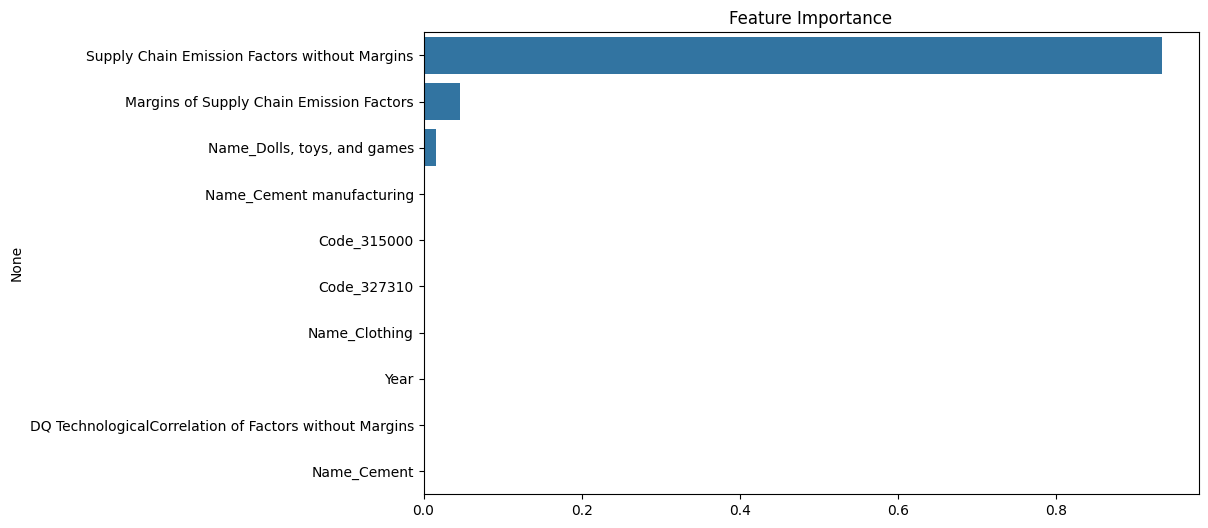

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Assuming 'GHG_Emissions_kgCO2e' is your target column
X = df.drop('Supply Chain Emission Factors with Margins', axis=1)
y = df['Supply Chain Emission Factors with Margins']

# Encode categorical variables
X = pd.get_dummies(X)

# Train Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)

# Plot top 10 important features
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.show()

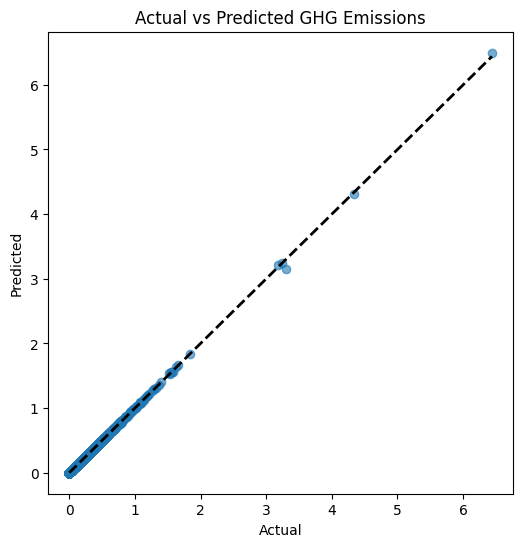

R² Score: 0.9998820343971079
RMSE: 0.0025741398377032254


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model_rf.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted GHG Emissions')
plt.show()

print("R² Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

In [4]:
import os
print(os.listdir('/content/'))

['.config', 'sample_data']


In [9]:
excel_file = '/content/GHGemissionData.xlsx'  # Replace with actual path
years = range(2010, 2017)

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

df = pd.concat(all_data, ignore_index=True)

# Dropping the 'Unnamed: 7' column
df.drop(columns=['Unnamed: 7'], inplace=True)

# Mapping categorical variables
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
df['Substance'] = df['Substance'].map(substance_map)

unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {'Commodity': 0, 'Industry': 1}
df['Source'] = df['Source'].map(source_map)

df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0,0,0.398,0.073,0.470,4,3,1,4,1,0,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",1,0,0.001,0.001,0.002,4,3,1,1,1,0,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",2,0,0.002,0.000,0.002,4,3,1,4,1,0,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",3,1,0.002,0.000,0.002,3,3,1,3,1,0,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",0,0,0.659,0.081,0.740,4,3,1,4,1,0,2010


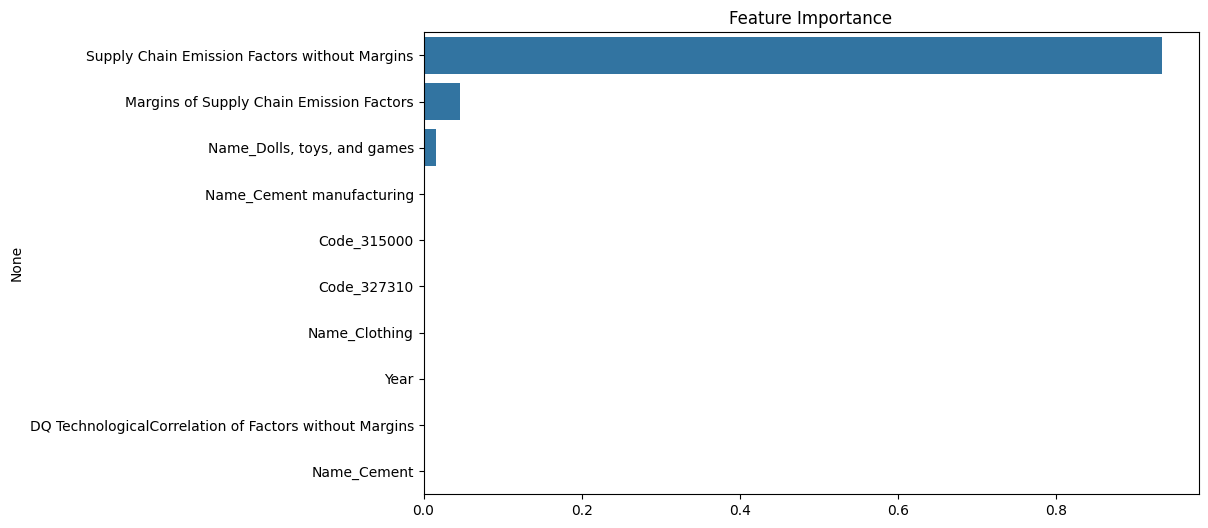

In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'GHG_Emissions_kgCO2e' is your target column
X = df.drop('Supply Chain Emission Factors with Margins', axis=1)
y = df['Supply Chain Emission Factors with Margins']

# Encode categorical variables
X = pd.get_dummies(X)

# Train Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)

# Plot top 10 important features
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.show()

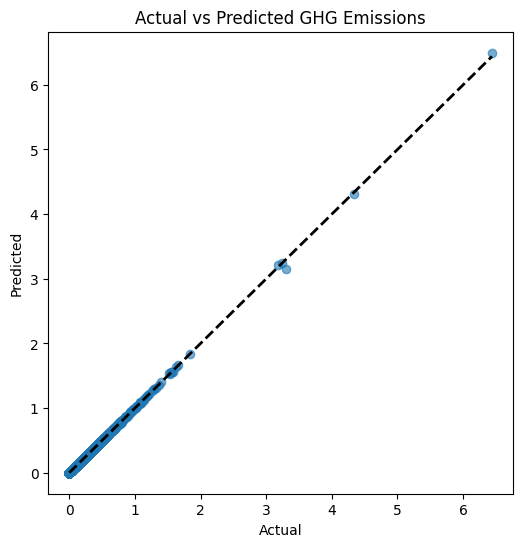

R² Score: 0.9998820343971079
RMSE: 0.0025741398377032254


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model_rf.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted GHG Emissions')
plt.show()

print("R² Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)